# Manual Simulation

In [208]:
import numpy as np
eps = 0.25

def payoff(a1,a2):
    if a1>a2:
        return 1-a1-eps
    elif a1==a2:
        return (1-a1-eps)/2
    else:
        return 0

def payoff2(a1,a2):
    if a1>a2:
        return 1-a2-eps
    elif a1==a2:
        return (1-a2-eps)/2
    else:
        return 0

N = 2
action2bid = np.linspace(0,1,N+1)
R = np.zeros((N+1,N+1))
for i in range(N+1):
    for j in range(N+1):
        R[i,j] = payoff(action2bid[i],action2bid[j])

np.round(R,2)
print(R)
R = R[0:N,0:N]
A = R
B = R.T
print(A)
print(B)

[[ 0.375  0.     0.   ]
 [ 0.25   0.125  0.   ]
 [-0.25  -0.25  -0.125]]
[[0.375 0.   ]
 [0.25  0.125]]
[[0.375 0.25 ]
 [0.    0.125]]


[0.30361103 0.48906663] [0.4 0.1]
1 0 [0.13757962 0.86242038]
1 0 [0.53534505 0.46465495]
1 0 [0.53456548 0.46543452]
0 0 [0.61839563 0.38160437]
1 0 [0.47348695 0.52651305]
0 0 [0.5129529 0.4870471]
1 0 [0.53770287 0.46229713]
0 0 [0.53147159 0.46852841]
0 0 [0.56662787 0.43337213]
1 0 [0.53477162 0.46522838]


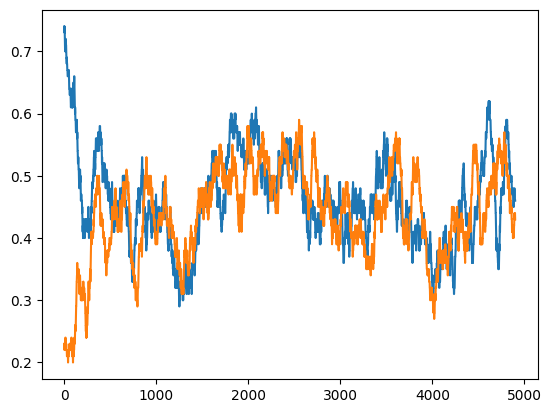

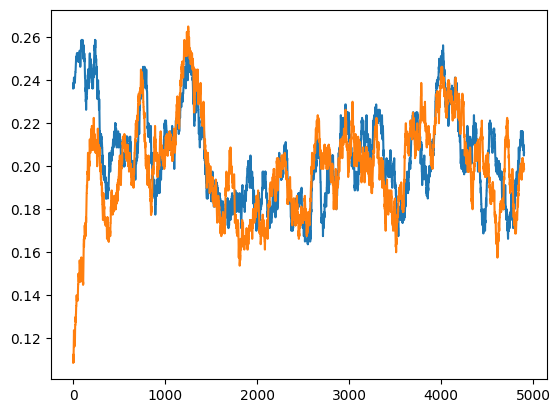

In [210]:
import numpy as np

n_actions = N

alpha = 0.01
tau = 0.1
Q1 = np.random.uniform(0, 0.5, n_actions)
Q2 = np.random.uniform(0, 0.5, n_actions)
Q2 = np.array([0.4, 0.1])
print(Q1,Q2)
def select_action_boltzmann(Q, tau):
    p = np.clip(np.exp(Q / tau + 1e-8) / np.sum(np.exp(Q / tau + 1e-8)),1e-4,1-1e-4)
    p = p/np.sum(p)
    a = np.random.choice(n_actions, p=p)
    return a

a1_path = []
a2_path = []
r1_path = []
r2_path = []
n_episodes = 5000
for episode in range(n_episodes):
    a1 = select_action_boltzmann(Q1, tau)
    a2 = select_action_boltzmann(Q2, tau)
    r1 = R[a1, a2]
    r2 = R[a2, a1]
    Q1[a1] += alpha * (r1 + tau * np.max(Q1) - Q1[a1])
    Q2[a2] += alpha * (r2 + tau * np.max(Q2) - Q2[a2])
    a1_path.append(a1)
    a2_path.append(a2)
    r1_path.append(r1)
    r2_path.append(r2)
    if episode % (n_episodes/10) == 0:
        print(a1,a2,np.exp(Q1 / tau + 1e-8) / np.sum(np.exp(Q1 / tau + 1e-8)))


def running_mean(data, window_size):
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

import matplotlib.pyplot as plt
plt.plot((running_mean(a1_path,100)))
plt.plot((running_mean(a2_path,100)))
plt.show()
plt.plot((running_mean(r1_path,100)))
plt.plot((running_mean(r2_path,100)))
plt.show()

In [211]:
import numpy as np
import matplotlib.pyplot as plt

n_actions = N
alpha = 0.01
tau = 0.01
n_episodes = 5000
n_runs = 60  # Specify the number of runs

initial_Q1_values = []  # Store initial Q1 values for each run
initial_Q2_values = []  # Store initial Q2 values for each run
final_outcomes = []     # Store final outcomes for each run

for run in range(n_runs):
    Q1 = np.random.uniform(0, 0.5, n_actions)
    Q2 = np.random.uniform(0, 0.5, n_actions)
    Q2 = np.array([0.4, 0.1])

    a1_path = []
    a2_path = []
    r1_path = []
    r2_path = []

    for episode in range(n_episodes):
        a1 = select_action_boltzmann(Q1, tau)
        a2 = select_action_boltzmann(Q2, tau)
        r1 = R[a1, a2]
        r2 = R[a2, a1]
        Q1[a1] += alpha * (r1 + tau * np.max(Q1) - Q1[a1])
        Q2[a2] += alpha * (r2 + tau * np.max(Q2) - Q2[a2])
        a1_path.append(a1)
        a2_path.append(a2)
        r1_path.append(r1)
        r2_path.append(r2)

    # Store the initial Q values for this run
    initial_Q1_values.append(Q1.copy())
    initial_Q2_values.append(Q2.copy())

    # Determine the final outcome and store it
    final_outcome = (a1_path[-1], a2_path[-1])
    final_outcomes.append(final_outcome)

    if run % (n_runs // n_runs) == 0:
        print(f"Run {run + 1} - Final Outcome: {final_outcome}")

Run 1 - Final Outcome: (0, 0)
Run 2 - Final Outcome: (1, 1)
Run 3 - Final Outcome: (0, 0)
Run 4 - Final Outcome: (0, 0)
Run 5 - Final Outcome: (0, 0)
Run 6 - Final Outcome: (0, 0)
Run 7 - Final Outcome: (1, 1)
Run 8 - Final Outcome: (1, 1)
Run 9 - Final Outcome: (0, 0)
Run 10 - Final Outcome: (1, 1)
Run 11 - Final Outcome: (0, 0)
Run 12 - Final Outcome: (1, 1)
Run 13 - Final Outcome: (1, 1)
Run 14 - Final Outcome: (0, 0)
Run 15 - Final Outcome: (1, 1)
Run 16 - Final Outcome: (0, 0)
Run 17 - Final Outcome: (0, 0)
Run 18 - Final Outcome: (1, 1)
Run 19 - Final Outcome: (0, 0)
Run 20 - Final Outcome: (0, 0)
Run 21 - Final Outcome: (0, 0)
Run 22 - Final Outcome: (0, 0)
Run 23 - Final Outcome: (0, 0)
Run 24 - Final Outcome: (1, 1)
Run 25 - Final Outcome: (1, 1)
Run 26 - Final Outcome: (0, 0)
Run 27 - Final Outcome: (0, 0)
Run 28 - Final Outcome: (0, 0)
Run 29 - Final Outcome: (0, 0)
Run 30 - Final Outcome: (1, 1)
Run 31 - Final Outcome: (1, 1)
Run 32 - Final Outcome: (0, 0)
Run 33 - Final Ou

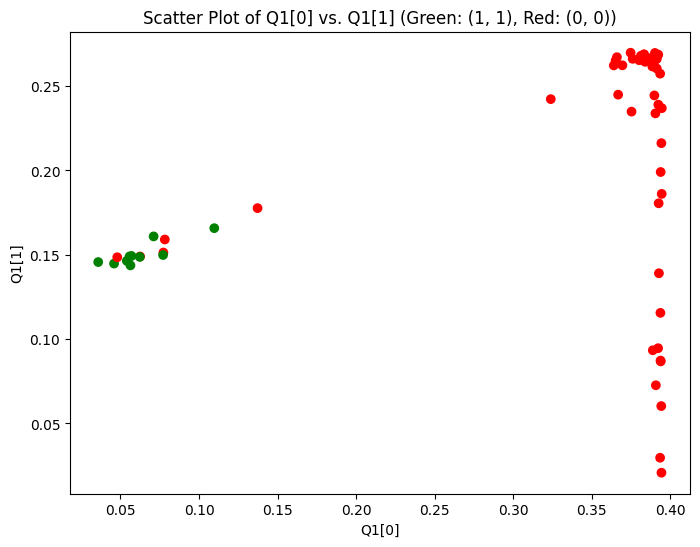

In [170]:
# Create a scatter plot of Q1[0] vs. Q1[1] with different colors for outcomes (1,1) and (0,0)
Q1_values = np.array(initial_Q1_values)
outcomes = np.array(final_outcomes)

# Check if all elements in outcomes are equal to (1, 1) for each run
is_win = [np.all(outcome == (1, 1)) for outcome in outcomes]

# Assign colors based on the win condition
colors = ['g' if win else 'r' for win in is_win]

plt.figure(figsize=(8, 6))
plt.scatter(Q1_values[:, 0], Q1_values[:, 1], c=colors, marker='o')
plt.xlabel('Q1[0]')
plt.ylabel('Q1[1]')
plt.title('Scatter Plot of Q1[0] vs. Q1[1] (Green: (1, 1), Red: (0, 0))')
plt.show()

# Replicator Dynamic

In [174]:
A, B

(array([[0.375, 0.   ],
        [0.25 , 0.125]]),
 array([[0.375, 0.25 ],
        [0.   , 0.125]]))

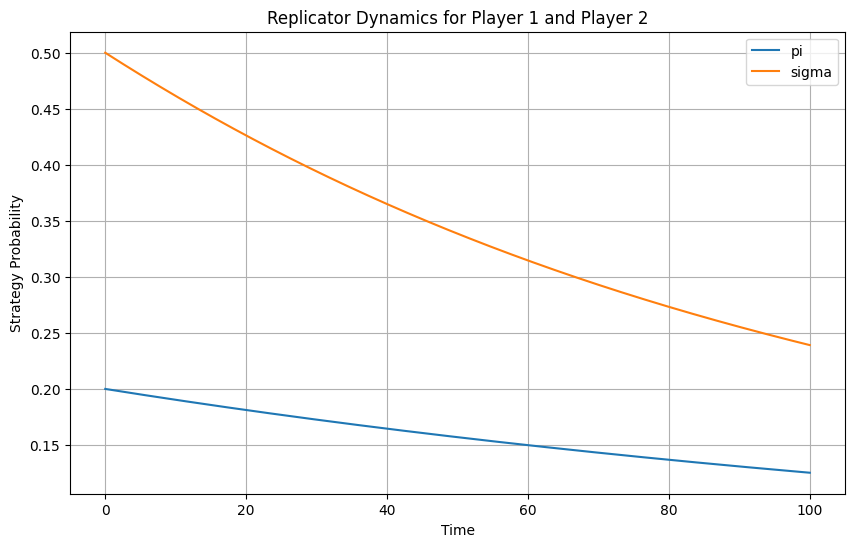

In [175]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
alpha = 0.01  # Learning rate
tau = 0.05  # Temperature

# Initialize the initial mixed strategy probabilities (pi and sigma)
pi0 = 0.2  # Initial mixed strategy for player 1
sigma0 = 0.5  # Initial mixed strategy for player 2

# Define the Replicator Dynamics equations for both players
def replicator_dynamics(t, p):
    pi = p[0]
    sigma = p[1]
    
    # Calculate exploitation term for player 1
    exploitation_pi = alpha * pi * (np.dot(A, [sigma, 1 - sigma])[0] - np.dot(np.array([pi, 1 - pi]).T, np.dot(A, [sigma, 1 - sigma])))
    
    # Calculate exploration term for player 1
    exploration_pi = alpha * pi * (pi * np.log(pi) + (1 - pi) * np.log(1 - pi))
    
    # Calculate exploitation term for player 2
    exploitation_sigma = alpha * sigma * (np.dot(np.array([pi, 1 - pi]).T, B)[0] - np.dot(np.array([pi, 1 - pi]).T, np.dot(A, [sigma, 1 - sigma])))
    
    # Calculate exploration term for player 2
    exploration_sigma = alpha * sigma * (sigma * np.log(sigma) + (1 - sigma) * np.log(1 - sigma))
    
    # Combine exploitation and exploration for both players
    dp_dt = [exploitation_pi + exploration_pi, exploitation_sigma + exploration_sigma]
    
    return dp_dt

# Combine the initial mixed strategies for both players
initial_p = [pi0, sigma0]

# Time span for integration
t_span = (0, 100)  # Adjust as needed

# Solve the system of differential equations
sol = solve_ivp(replicator_dynamics, t_span, initial_p, t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Extract the results
t = sol.t
pi_values = sol.y[0]
sigma_values = sol.y[1]

# Plot the dynamics of pi and sigma over time
plt.figure(figsize=(10, 6))
plt.plot(t, pi_values, label='pi')
plt.plot(t, sigma_values, label='sigma')
plt.xlabel('Time')
plt.ylabel('Strategy Probability')
plt.title('Replicator Dynamics for Player 1 and Player 2')
plt.legend()
plt.grid()
plt.show()


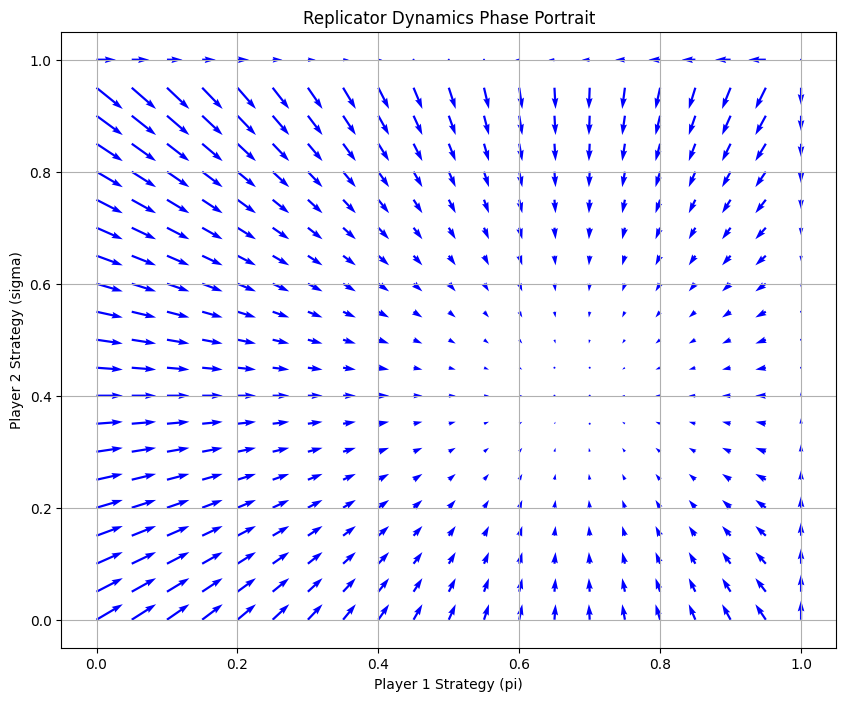

Initial pi = 1.00, Initial sigma = 1.00, Final pi = 1.00, Final sigma = 1.00


In [214]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
alpha = 0.1  # Learning rate
tau = 0.2 # Temperature

# Create a grid of initial mixed strategy probabilities for player 1 and player 2
initial_conditions = np.linspace(0, 1, 21)  # Adjust the range and granularity as needed

# Create a grid for the phase portrait
grid_size = len(initial_conditions)
pi_grid, sigma_grid = np.meshgrid(initial_conditions, initial_conditions)

# Initialize arrays to store the trajectories
pi_trajectories = np.zeros_like(pi_grid)
sigma_trajectories = np.zeros_like(sigma_grid)

# Define the Replicator Dynamics equations for both players
def replicator_dynamics(t, p):
    pi, sigma = p
    # Avoid divide by zero and invalid value warnings
    eps = 1e-10
    valid_pi = np.where((pi > eps) & (pi < 1 - eps), pi, eps)
    valid_sigma = np.where((sigma > eps) & (sigma < 1 - eps), sigma, eps)
    exploration_pi = alpha * valid_pi * (valid_pi * np.log(valid_pi) + (1 - valid_pi) * np.log(1 - valid_pi) - np.log(valid_pi))
    exploration_sigma = alpha * valid_sigma * (valid_sigma * np.log(valid_sigma) + (1 - valid_sigma) * np.log(1 - valid_sigma) - np.log(valid_sigma))
    
    exploitation_pi = alpha * valid_pi / tau * (np.dot(A, [sigma, 1 - sigma])[0] - np.dot(np.array([valid_pi, 1 - valid_pi]).T, np.dot(A, [sigma, 1 - sigma])))
    exploitation_sigma = alpha * valid_sigma / tau * (np.dot(np.array([pi, 1 - pi]).T, B)[0] - np.dot(np.array([pi, 1 - pi]).T, np.dot(B, [sigma, 1 - sigma])))
    
    dp_dt = [exploitation_pi + exploration_pi, exploitation_sigma + exploration_sigma]
    return dp_dt

# Iterate over the initial conditions and compute trajectories
for i in range(grid_size):
    for j in range(grid_size):
        initial_p = [pi_grid[i, j], sigma_grid[i, j]]
        sol = solve_ivp(replicator_dynamics, (0, 100), initial_p, t_eval=np.linspace(0, 100, 1000))
        pi_trajectories[i, j] = sol.y[0][-1]
        sigma_trajectories[i, j] = sol.y[1][-1]

# Create a phase portrait
plt.figure(figsize=(10, 8))
plt.quiver(pi_grid, sigma_grid, pi_trajectories - pi_grid, sigma_trajectories - sigma_grid, scale=20, color='b')
plt.xlabel('Player 1 Strategy (pi)')
plt.ylabel('Player 2 Strategy (sigma)')
plt.title('Replicator Dynamics Phase Portrait')
plt.grid()
plt.show()

# Print final values when both pi and sigma reach 1.0
for i in range(grid_size):
    for j in range(grid_size):
        if pi_trajectories[i, j] >= 1.0 and sigma_trajectories[i, j] >= 1.0:
            print(f"Initial pi = {pi_grid[i, j]:.2f}, Initial sigma = {sigma_grid[i, j]:.2f}, Final pi = {pi_trajectories[i, j]:.2f}, Final sigma = {sigma_trajectories[i, j]:.2f}")
